In [737]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **House Price Prediction**

In [738]:
# importing all the required libreries
import numpy as np
import pandas as pd
from scipy.stats import skew
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [739]:
# loading the dataset
df = pd.read_csv('boston.csv')

# **Exploratory Data Analysis (EDA)**

In [740]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [741]:
# peaking at the diffrent labels in the dataset

df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [742]:
# checking the number of rows and columns of the dataset

df.shape 

(506, 14)

In [743]:
# checking for duplicate data

df.duplicated().sum() 

0

In [744]:
# getting the information about dataframe

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


> ***From the above we see there is no object type variable***

In [745]:
# checking for columns which has null values

df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# **Preprocessing**
## **Checking for Correlation**

<AxesSubplot:>

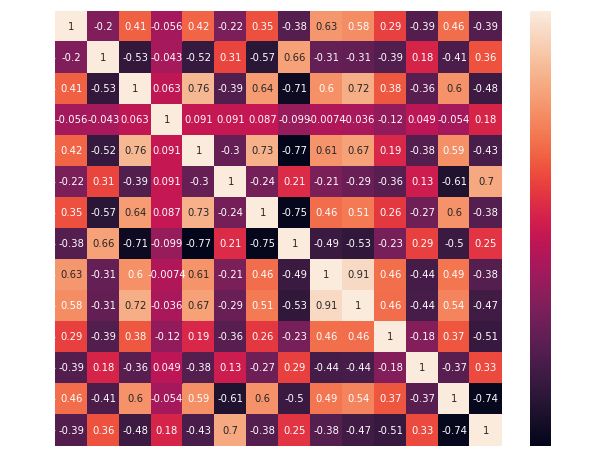

In [746]:
# correlation using heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot = True)

> ***From the above we can see LSTAT, PTRAIO and  RM have a strong correlation with MEDV***

In [747]:
# correlation matrix

correlation=df.corr()

# correlation with price

correlation["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

> ***Hear we can see that RM, LSTAT and PRRATIO have a strong correlation with MEDV(PRICE)***

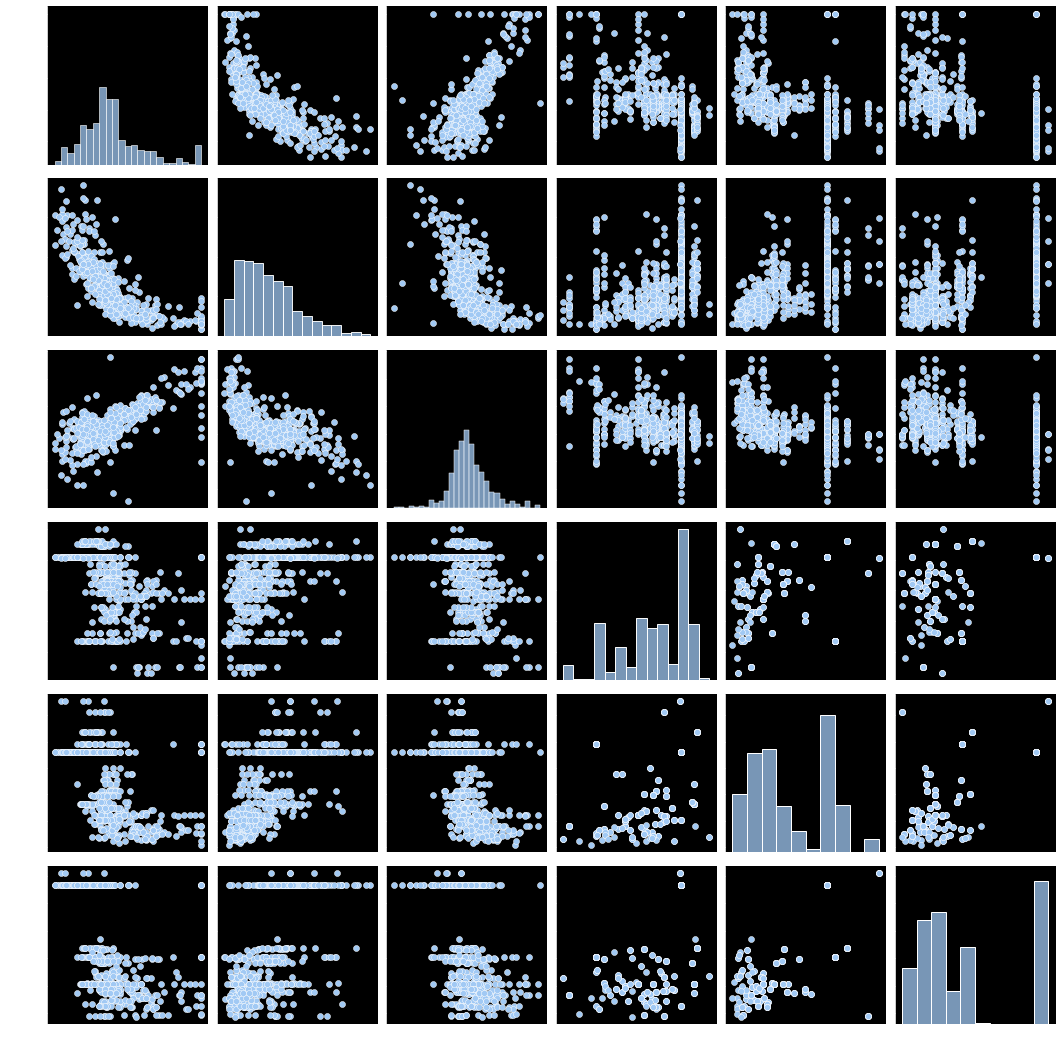

In [748]:
# correlation using scatter matrix

from pandas.plotting import scatter_matrix 
attributes = ["MEDV","LSTAT","RM","PTRATIO","INDUS","TAX"]
sns.pairplot(df[attributes],kind="scatter")

> ***Hear we can see LSTAT and RM have a good relation with MEDV***

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

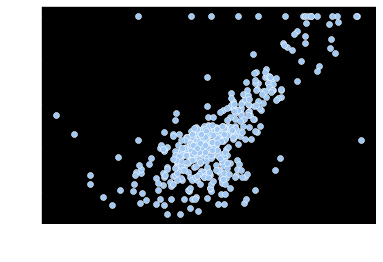

In [749]:
# plotting RM vs MEDV

sns.scatterplot(x="RM", y="MEDV", data=df)

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

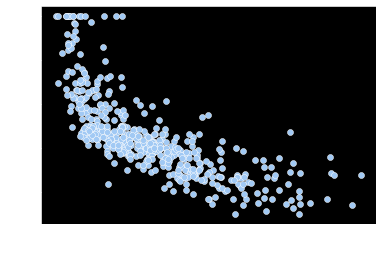

In [750]:
# plotting LSTAT vs MEDV

sns.scatterplot(x="LSTAT", y="MEDV", data=df)

In [751]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Checking the skewness

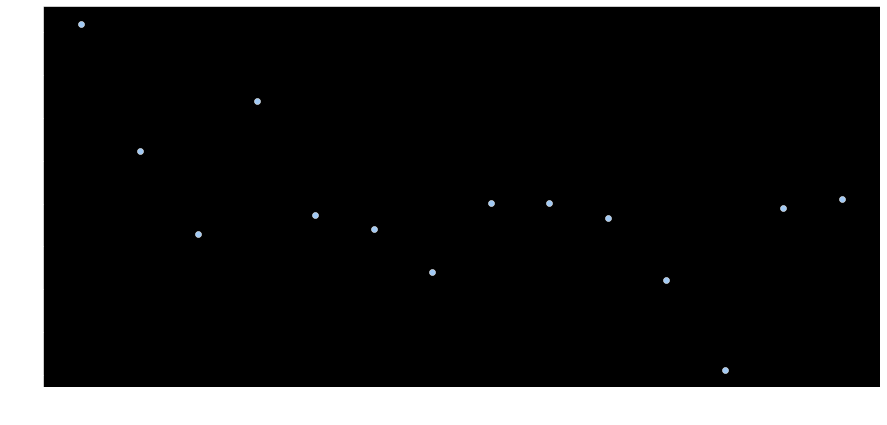

In [752]:
col_name = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
        'PTRATIO', 'B', 'LSTAT', 'MEDV']
skw = []
for col in df:
    skw.append(skew(df[col]))
new_df = pd.DataFrame({"Column":col_name,"Skew":skw})
plt.figure(figsize=(15,7))
sns.scatterplot(data=new_df, x="Column", y="Skew")
plt.show()

> ***From the above we can see that some of the features are highly skewed***

> ***But we should improve the skew scymmetry of only some of them keeping in mind
of their correlation with MEDV.***

> ***So, when is the skewness too much?  The rule of thumb seems to be:***
> - ***If the skewness is between -0.5 and 0.5, the data are fairly symmetrical***
> - ***If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed***
> - ***If the skewness is less than -1 or greater than 1, the data are highly skewed.***



> ***So from this we can conclude that taking the square root gives us a semmetric skew 
and since we have all +ve values in MEDV column, we can say that a square root transformation would be appropriate.***


> ***Check [hear](https://stats.stackexchange.com/questions/107610/what-is-the-reason-the-log-transformation-is-used-with-right-skewed-distribution) or [hear](https://www.spcforexcel.com/knowledge/basic-statistics/are-skewness-and-kurtosis-useful-statistics) to get some details about log transformation, squar root transformation and skewness of a plot.***

In [753]:
new_df['Correlation'] = correlation["MEDV"].tolist()

In [754]:
new_df.sort_values(by='Correlation',ascending=False)

,Column,Skew,Correlation
13,MEDV,1.104811,1.000000
5,RM,0.402415,0.695360
1,ZN,2.219063,0.360445
11,B,-2.881798,0.333461
7,DIS,1.008779,0.249929
3,CHAS,3.395799,0.175260
6,AGE,-0.597186,-0.376955
8,RAD,1.001833,-0.381626
0,CRIM,5.207652,-0.388305
4,NOX,0.727144,-0.427321


> ***So the columns whose skew scymmetry we should improve are***
> - ***CHAS -> Because very highly skewed and less correlated with MEDV***
> - ***ZN -> Because highly skewed and less correlated with MEDV***
> - ***B -> Because highly skewed and less correlated with MEDV***
> - ***DIS-> Because highly skewed and less correlated with MEDV***
> - ***AGE-> Because highly skewed and less correlated with MEDV***

In [755]:
# defining a function for plotting the histograms

def hst(dfrm):    
    sns.set_palette("pastel")
    sns.histplot(data=dfrm)
    plt.title("Skewness")
    plt.show()

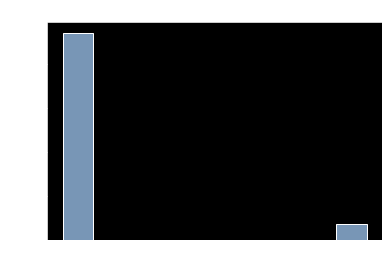

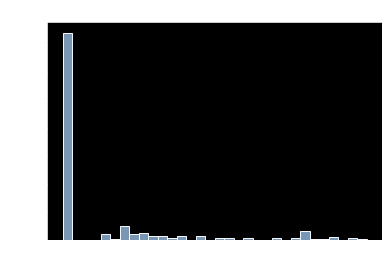

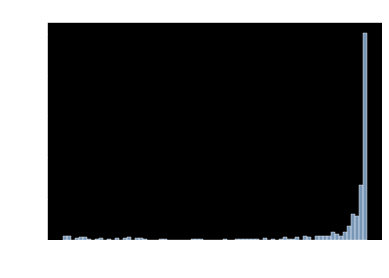

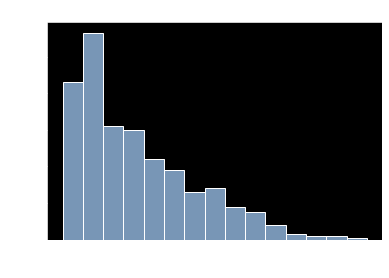

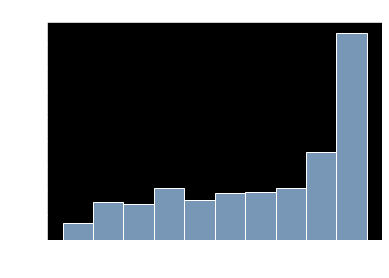

In [756]:
# plotting for the features whose skewness we are going to modify 

hst(df["CHAS"]) 
hst(df["ZN"]) 
hst(df["B"]) 
hst(df["DIS"]) 
hst(df["AGE"]) 

In [757]:
# Since CHAS has only 2 types of values
# Lets modify the skewness of +vely skewed ZN and DIS

df["ZN"] = np.log1p(df["ZN"])
df["DIS"] = np.log1p(df["DIS"])

skew(df["ZN"]), skew(df["DIS"])

(1.1899105701640726, 0.3305777426343001)

In [758]:
skew(np.square(df["AGE"]))

-0.18263633415807376

> ***From the above we see that the negetive skewness of AGE column can be impoved***

In [759]:
df["AGE"] = np.square(df["AGE"])

In [760]:
skew(np.power(df["B"],9))

-1.2065522881133721

> ***From the above we see that the column B is very hard to transform and since its correlation with MEDV is not that good so it would be a good idea to drop the column***

In [761]:
df.drop('B', inplace=True, axis=1)

In [762]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,2.944439,2.31,0,0.538,6.575,4251.04,1.627278,1,296.0,15.3,4.98,24.0
1,0.02731,0.000000,7.07,0,0.469,6.421,6225.21,1.786261,2,242.0,17.8,9.14,21.6
2,0.02729,0.000000,7.07,0,0.469,7.185,3733.21,1.786261,2,242.0,17.8,4.03,34.7
3,0.03237,0.000000,2.18,0,0.458,6.998,2097.64,1.954757,3,222.0,18.7,2.94,33.4
4,0.06905,0.000000,2.18,0,0.458,7.147,2937.64,1.954757,3,222.0,18.7,5.33,36.2


# Scaling

In [763]:
X = df.drop(columns=["MEDV"],axis=1)
y = df["MEDV"]

In [764]:
from sklearn.preprocessing import StandardScaler

for col in X:
    ss = StandardScaler()
    df[col] = ss.fit_transform(X[[col]])

In [765]:
X.shape, y.shape

((506, 12), (506,))

# **Model** 

## Using Linear Regression

In [766]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [767]:
# Performing train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.8,random_state=42)

In [768]:
# creating the object

model = LinearRegression()

In [769]:
# creating the object

model.fit(X_train,y_train)

LinearRegression()

In [770]:
# finding the accuracy

acr = model.score(X_test,y_test)*100
acr

69.77795956295722

In [771]:
# finding the Root Mean Squared Error

y_predict = model.predict(X_test) 
rmse= np.sqrt(mean_squared_error(y_predict,y_test))
rmse

4.707755898591819

## Using Random Forest 

In [772]:
from sklearn.ensemble import RandomForestRegressor

# creating the object

model1 = RandomForestRegressor()

In [773]:
# fitting the training values

model1.fit(X_train,y_train)

RandomForestRegressor()

In [774]:
# finding the accuracy

acr1 = model1.score(X_test,y_test)*100
acr1

88.74693869210302

In [775]:
# finding the Root Mean Squared Error

y_predict1 = model1.predict(X_test)
rmse1 = np.sqrt(mean_squared_error(y_predict1,y_test))
rmse1

2.8726809043872894

## Using Decission Tree

In [776]:
from sklearn.tree import DecisionTreeRegressor

# creating the object

model2 = DecisionTreeRegressor()

In [777]:
# fitting the training values

model2.fit(X_train,y_train)

DecisionTreeRegressor()

In [778]:
# finding the accuracy

acr2 = model2.score(X_test,y_test)*100

In [779]:
# finding the Root Mean Squared Error

y_predict2=model2.predict(X_test)
rmse2= np.sqrt(mean_squared_error(y_predict2,y_test))
rmse2

3.195999337406984

# Result/Outcome

In [781]:
rslt=pd.DataFrame({
    "Model used" : ['Linear Regression','Random Forest' ,'Decision Tree'],
    "RMSE" :[rmse,rmse1,rmse2],
    "Accuracy(%)":[acr,acr1,acr2]
})

rslt.sort_values("Accuracy(%)",ascending=False)

,Model used,RMSE,Accuracy(%)
1,Random Forest,2.872681,88.746939
2,Decision Tree,3.195999,86.071342
0,Linear Regression,4.707756,69.777960
